In [1]:
import numpy as np
import pandas as pd

# Import Data

In [2]:
# Import data.
loan_data_preprocessed_backup = pd.read_csv('loan_data_pre.csv')

/var/folders/k3/04fgtvt54_ng2689r4hkrtzw0000gn/T/ipykernel_96770/3019389623.py:2: DtypeWarning: Columns (20,48) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_preprocessed_backup = pd.read_csv('loan_data_pre.csv')


# Explore Data

In [3]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [4]:
loan_data_preprocessed.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [5]:
loan_data_preprocessed.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0,0,0,0,0,0,0,0,1,0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0,0,0,0,0,0,0,0,1,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0,0,0,0,0,0,0,0,1,0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0,0,0,0,0,0,0,0,1,0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0,0,0,0,0,0,0,0,1,0


In [6]:
loan_data_preprocessed.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,1,0,0,0,0,0,0,0,0,1
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,0,0,0,0,0,0,0,0,1,0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,0,0,0,0,0,0,0,0,1,0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,0,0,0,0,0,0,0,0,0,1
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,...,0,0,0,0,0,0,0,0,1,0


In [7]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]
# Here we take only the accounts that were charged-off (written-off).

In [8]:
loan_data_defaults.shape

(43236, 207)

In [9]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [10]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                                          2337
home_ownership                                     

# Independent Variables

In [11]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

/var/folders/k3/04fgtvt54_ng2689r4hkrtzw0000gn/T/ipykernel_96770/1935142453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)


In [12]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

/var/folders/k3/04fgtvt54_ng2689r4hkrtzw0000gn/T/ipykernel_96770/4107388959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)


# Dependent Variables

In [13]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the LGD model: recovery rate.
# It is the ratio of recoveries and funded amount.

/var/folders/k3/04fgtvt54_ng2689r4hkrtzw0000gn/T/ipykernel_96770/591376217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']


In [14]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [15]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.

/var/folders/k3/04fgtvt54_ng2689r4hkrtzw0000gn/T/ipykernel_96770/1169471315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
/var/folders/k3/04fgtvt54_ng2689r4hkrtzw0000gn/T/ipykernel_96770/1169471315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])


In [16]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

In [17]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the EAD model: credit conversion factor.
# It is the ratio of the difference of the amount used at the moment of default to the total funded amount.

/var/folders/k3/04fgtvt54_ng2689r4hkrtzw0000gn/T/ipykernel_96770/3733798387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']


In [18]:
loan_data_defaults.to_csv('loan_data_defaults.csv')
# We save the data to a CSV file.

# Explore Dependent Variables

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

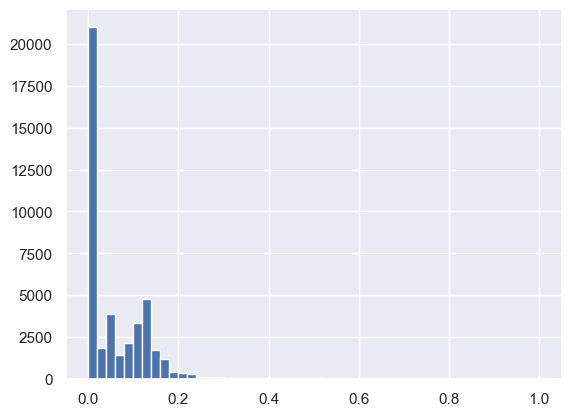

In [20]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)
# We plot a histogram of a variable with 50 bins.

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

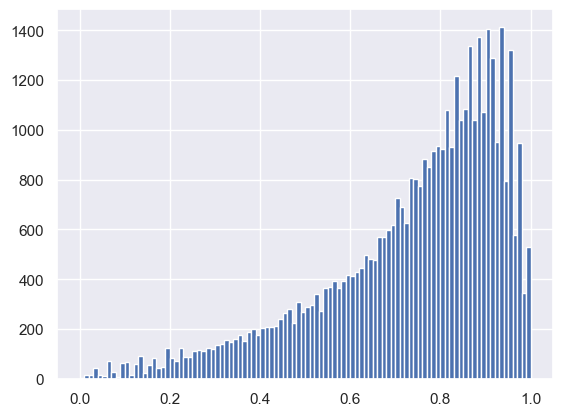

In [21]:
plt.hist(loan_data_defaults['CCF'], bins = 100)
# We plot a histogram of a variable with 100 bins.

In [22]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.

/var/folders/k3/04fgtvt54_ng2689r4hkrtzw0000gn/T/ipykernel_96770/2299087683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)
